In [1]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.ticker import MultipleLocator
from task import Task
from scheduling import SystemScheduling
from scheduling import JobExecution
#from ftp_rm_scheduling import get_ftp_rm_schedule

def set_limits_of_graph(sys_schedules : SystemScheduling, graph):
    graph.set_ylim(0, len(sys_schedules.tasks)*2 )
    graph.set_xlim(0, sys_schedules.feasibility_interval)
    
def get_list_of_colors():
    name = "tab10"
    cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
    return cmap.colors  # type: list
    
def set_axes_labels(gnt):
    gnt.set_xlabel('CPU Moments')
    gnt.set_ylabel('Tasks')
    
def set_x_ticks(gnt, time_limit):
    # Setting ticks on y-axis
    #major_ticks = np.arange(0, time_limit, 5)
    #minor_ticks = np.arange(0, time_limit, 1)
    #gnt.set_xticks(minor_ticks, )
    #gnt.set_xticks(major_ticks)
    #gnt.tick_params(which='minor', length=1)
    gnt.xaxis.set_minor_locator(MultipleLocator(1))

    # Initialize minor ticks
    #gnt.minorticks_on()
    
def set_y_ticks(gnt, tasks):
    tasks_len = len(tasks)
    #should update
    ticks = []
    labels = []
    for i in range(tasks_len):
        ticks.append(((i)*2))
        labels.append(i+1)
    

    # Now minor ticks exist and are turned on for both axes

    # Turn off x-axis minor ticks
    #gnt.yaxis.set_tick_params(which='minor', bottom=False)
    
    gnt.set_yticks(ticks)
    # Labelling tickes of y-axis
    gnt.set_yticklabels(labels)
# TODO to test
def draw_periods_for_task(task_index, tasks, gnt):
    task = tasks[task_index]
    for i in range(0, sys_schedules.feasibility_interval, task.period):
        
        tasks_len = len(tasks)
        
        max_i = 1 - ((tasks) * (1/tasks_len))
        min_i = max_i - 1/tasks_len
        gnt.axvline(x = i, ymin = min_i, ymax = max_i,
            color ='red')
    
def draw_job_execution(gnt, job_execution, color):
    job_exe_t = job_execution.get_as_tuple()
    gnt.broken_barh(job_exe_t, (i*2,  1), facecolors=color)
    
def draw_job(gnt, job, color):
    for job_exe in job.job_executions:
        draw_job_execution(gnt, job_exe, color)
        
def draw_task_scheduling(gnt, task, color):
    for job in task.jobs:
        draw_job(gnt, job, color)
    
# TODO clean this ugly code
# TODO use a schedules object
def gantt_of_schedule(sys_schedules, time_limit , filename="gant_diagram.png"):
    """Save a png of the gant diagram of the given schedule

    Args:
        schedules (array): the schedule to draw
        time_limit ([type]): the time limit of the graph
    """
    TASKS_HEIGHT = 1
    
    # Declaring a figure "gnt"
    fig, gnt = plt.subplots()
    
    schedules = sys_schedules.get_array_of_schedules()
    time_limit = sys_schedules.feasibility_interval
    set_limits_of_graph(sys_schedules, gnt)
    
    colors = get_list_of_colors()
    gnt.set_prop_cycle(color=colors)
    # Setting labels for x-axis and y-axis
    set_axes_labels(gnt)
    
    #add periods of T1
    period_of_t1 = sys_schedules.tasks[0].period

    set_x_ticks(gnt, time_limit)
    set_y_ticks(gnt, sys_schedules.tasks)
    # Setting graph attribute
    gnt.grid(True)
    #plt.style.use('classic')
    #after
    for i, schedule in enumerate(reversed(schedules)):
        print(schedule)
        gnt.broken_barh(schedule, (i*2,  1), facecolors=colors[i])

    #before
    """
    for i, schedule in enumerate(reversed(schedules)):
        #for j, task in enumerate(schedule):
        T = []
        for j, job in enumerate(schedule):
            tup = (job.start, job.nb_cpu_units)
            T.append(tup)
        gnt.broken_barh(T, (i*2,  1), facecolors=colors[i])
    """
    #plt.savefig(filename)
    return plt
    


[(0, 3), (5, 3), (10, 3), (15, 3), (20, 3), (25, 3), (30, 3), (35, 3)]
[(3, 2), (13, 2), (23, 2), (33, 2)]
[(8, 2), (18, 2), (28, 2), (38, 2)]

0


In [2]:
from scheduling import get_scheduling_course_first_exemple
from scheduling import get_scheduling_course_second_exemple

def ultimate_test():
    schedules = get_scheduling_course_first_exemple()
    #arr = schedules.get_array_of_schedules()
    gantt_of_schedule(schedules, 26, "second_course_example.png")

[(8, 2), (18, 2), (28, 2), (38, 2)]
[(3, 2), (13, 2), (23, 2), (33, 2)]
[(0, 3), (5, 3), (10, 3), (15, 3), (20, 3), (25, 3), (30, 3), (35, 3)]


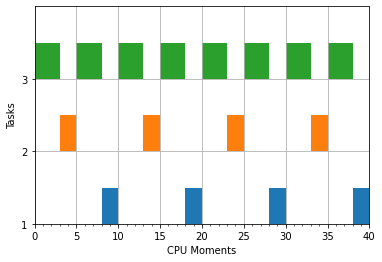

In [3]:
ultimate_test()

In [42]:
job_exe = JobExecution(0,5)
job_exe.get_as_tuple()



(0, 5)